# Assignment 1 Part 2 

For the exercises below you can use the numpy and scipy libraries.

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the [linear regression example from the class notes](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/regression/linear-regression/linear_regression.html), develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

Coefficients: [ 2.20896784 -7.08242899  4.62027941]


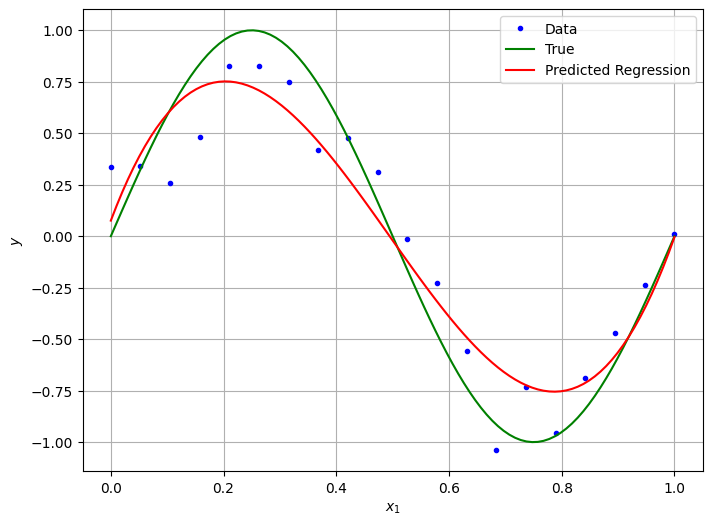

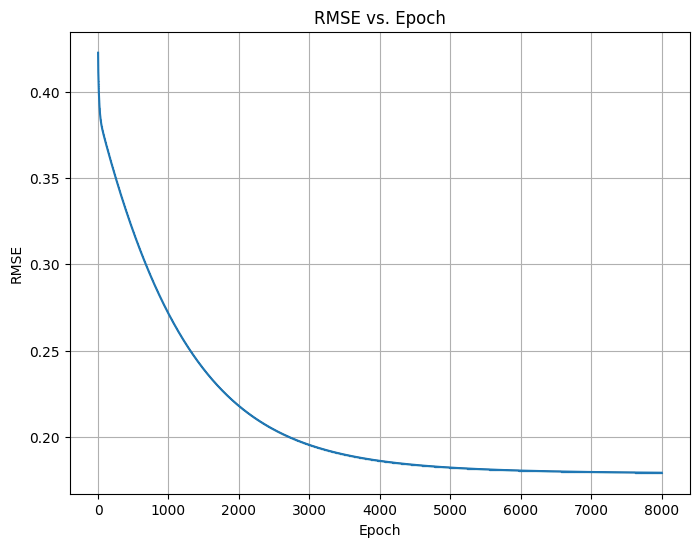

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def sin_func(x):
    return np.sin(2 * np.pi * x)

def generate_data(func, n_samples, noise, bounds=[0, 1]):
    x_vals = np.linspace(bounds[0], bounds[1], n_samples)
    np.random.shuffle(x_vals)
    y_vals = func(x_vals) + np.random.normal(scale=noise, size=x_vals.shape)
    return x_vals, y_vals

x_data, y_data = generate_data(sin_func, 20, 0.25)
x_eval = np.linspace(0, 1, 100)
y_eval = sin_func(x_eval)

x_data = x_data.reshape(-1, 1)
x_eval = x_eval.reshape(-1, 1)

poly_order = 3
X_data_poly = np.column_stack([x_data ** i for i in range(1, poly_order + 1)])
X_eval_poly = np.column_stack([x_eval ** i for i in range(1, poly_order + 1)])

X_data_norm = (X_data_poly - np.mean(X_data_poly, axis=0)) / np.std(X_data_poly, axis=0)

weights = np.zeros(poly_order)

learning_rate = 0.2
reg_param = 0.0001
iterations = 8000

rmse_log = []

for i in range(iterations):
    predictions = np.dot(X_data_norm, weights)
    error = np.mean((predictions - y_data)**2) + reg_param * np.sum(weights**2)
    
    gradients = 2/len(y_data) * np.dot(X_data_norm.T, (predictions - y_data)) + 2 * reg_param * weights
    
    weights -= learning_rate * gradients
    
    pred_all = np.dot(X_data_norm, weights)
    rmse = np.sqrt(np.mean((pred_all - y_data)**2))
    rmse_log.append(rmse)

print("Coefficients:", weights)

X_eval_norm = (X_eval_poly - np.mean(X_data_poly, axis=0)) / np.std(X_data_poly, axis=0)

y_eval_pred = np.dot(X_eval_norm, weights)

plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, "b.", label="Data")
plt.plot(x_eval, y_eval, "g-", label="True")
plt.plot(x_eval, y_eval_pred, "r-", label="Predicted Regression")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, iterations + 1), rmse_log, marker='x', markersize=0.1)
plt.title("RMSE vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.show()


### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements to the implementation of Problem 3 (the linear regression problem) that can improve the convergence speed of the algorithm. Implement from scratch the following enhancements and compare the convergence speed of each algorithm to the baseline SGD algorithm

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

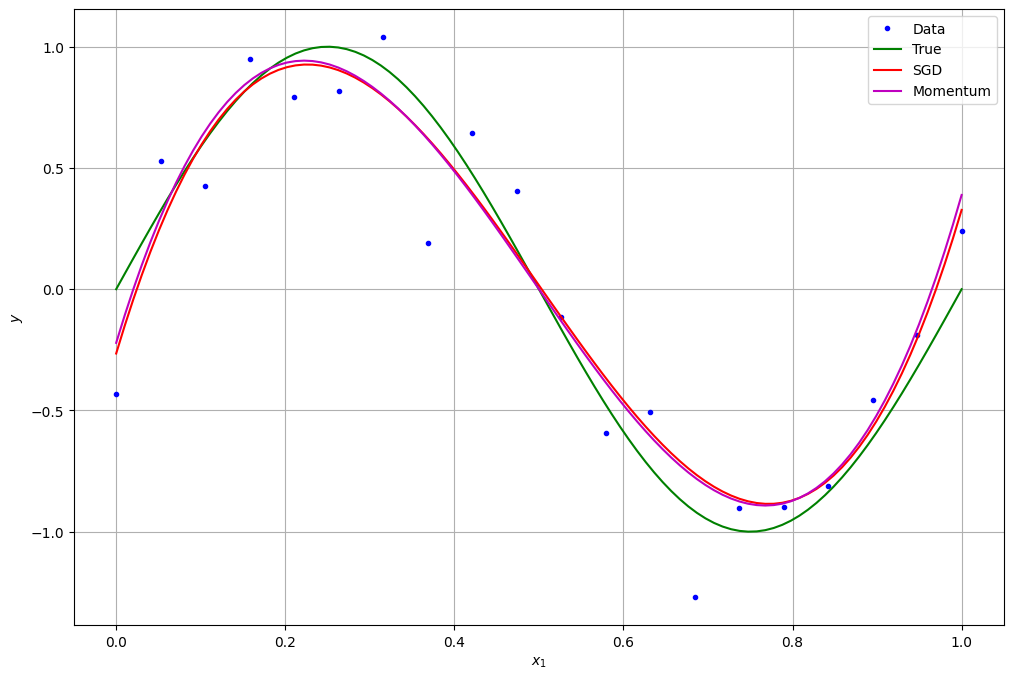

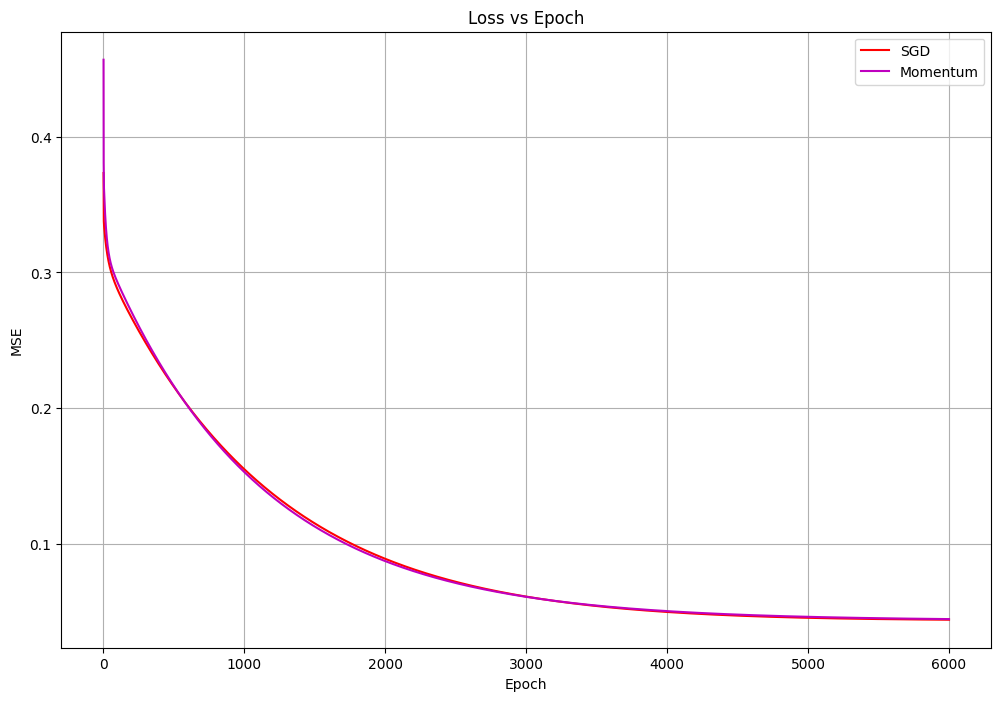

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def sin_wave(x):
    return np.sin(2 * np.pi * x)

def generate_data(func, n_points, noise_std, range_vals=[0, 1]):
    x = np.linspace(range_vals[0], range_vals[1], n_points)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=noise_std, size=x.shape)
    return x, y

def momentum_opt(x_data, y_data, poly_degree, learn_rate, momentum_beta, epochs):
    params = np.zeros(poly_degree + 1)
    X_poly = np.column_stack([x_data ** i for i in range(poly_degree + 1)])
    history = []
    velocity = np.zeros_like(params)
    for epoch in range(epochs):
        for i in range(len(y_data)):
            prediction = np.dot(X_poly[i], params)
            grad = 2 * (prediction - y_data[i]) * X_poly[i]
            velocity = momentum_beta * velocity + (1 - momentum_beta) * grad
            params -= learn_rate * velocity
        pred_total = np.dot(X_poly, params)
        loss = np.mean((pred_total - y_data)**2)
        history.append(loss)
    return params, history

def sgd_opt(x_data, y_data, poly_degree, learn_rate, epochs):
    params = np.zeros(poly_degree + 1)
    X_poly = np.column_stack([x_data ** i for i in range(poly_degree + 1)])
    history = []
    for epoch in range(epochs):
        for i in range(len(y_data)):
            prediction = np.dot(X_poly[i], params)
            grad = 2 * (prediction - y_data[i]) * X_poly[i]
            params -= learn_rate * grad
        pred_total = np.dot(X_poly, params)
        loss = np.mean((pred_total - y_data)**2)
        history.append(loss)
    return params, history

x_data, y_data = generate_data(sin_wave, 20, 0.25)
x_vals = np.linspace(0, 1, 100)
y_true = sin_wave(x_vals)

poly_deg = 3
lr = 0.08
beta = 0.9
epochs = 6000

params_sgd, loss_sgd = sgd_opt(x_data, y_data, poly_deg, lr, epochs)
params_momentum, loss_momentum = momentum_opt(x_data, y_data, poly_deg, lr, beta, epochs)

X_test_poly = np.column_stack([x_vals ** i for i in range(poly_deg + 1)])
y_pred_sgd = np.dot(X_test_poly, params_sgd)
y_pred_momentum = np.dot(X_test_poly, params_momentum)

plt.figure(figsize=(12, 8))
plt.plot(x_data, y_data, "b.", label="Data")
plt.plot(x_vals, y_true, "g-", label="True")
plt.plot(x_vals, y_pred_sgd, "r-", label="SGD")
plt.plot(x_vals, y_pred_momentum, "m-", label="Momentum")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(range(1, epochs + 1), loss_sgd, label="SGD", color='r')
plt.plot(range(1, epochs + 1), loss_momentum, label="Momentum", color='m')
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()


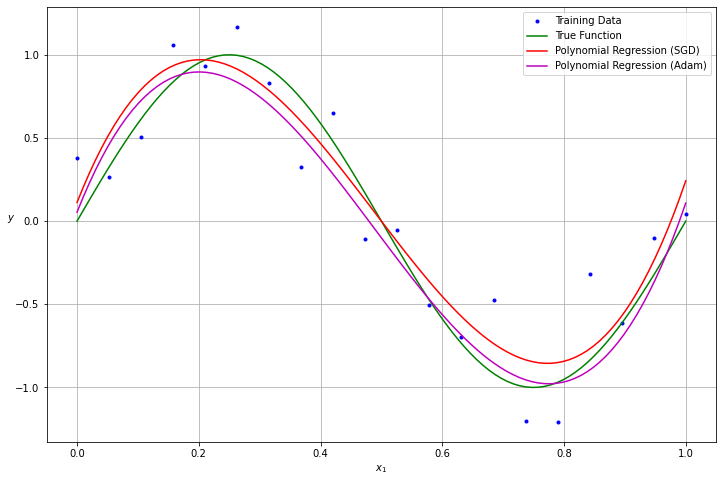

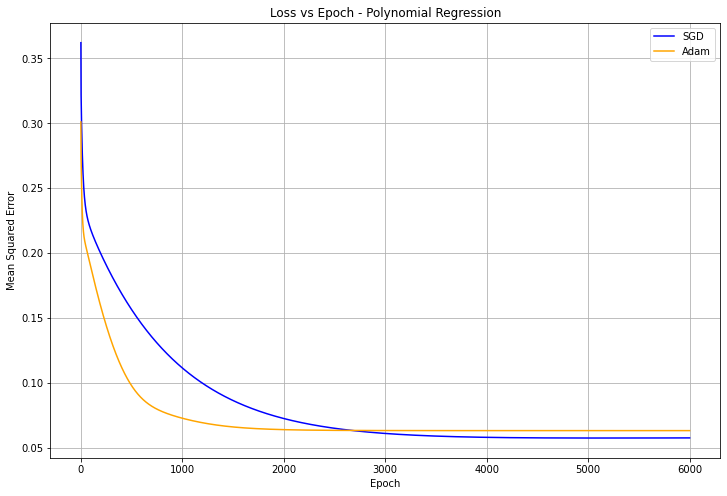

In [658]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sinusoidal function
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# Create toy data
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Stochastic Gradient Descent for Polynomial Regression
def stochastic_gradient_descent(x_train, y_train, degree, lr, n_iterations):
    # Initialize coefficients with zeros
    theta = np.zeros(degree + 1)

    # Learning rate
    alpha = lr

    # Add bias term to features
    X_train_poly = np.column_stack([x_train ** i for i in range(degree + 1)])

    # Lists to store loss and epoch values
    loss_history = []

    # SGD optimization
    for iteration in range(n_iterations):
        for i in range(len(y_train)):
            # Calculate prediction
            y_pred = np.dot(X_train_poly[i], theta)

            # Calculate the gradient of the loss with respect to each coefficient
            gradients = 2 * (y_pred - y_train[i]) * X_train_poly[i]

            # Update coefficients using the gradient and learning rate
            theta -= alpha * gradients

        # Calculate and store the loss for the current epoch
        y_pred_all = np.dot(X_train_poly, theta)
        loss = np.mean((y_pred_all - y_train)**2)
        loss_history.append(loss)

    return theta, loss_history

# Adam optimization for Polynomial Regression
def adam_optimization(x_train, y_train, degree, lr, beta1, beta2, epsilon, n_iterations):
    # Initialize coefficients with zeros
    theta = np.zeros(degree + 1)

    # Add bias term to features
    X_train_poly = np.column_stack([x_train ** i for i in range(degree + 1)])

    # Lists to store loss and epoch values
    loss_history = []

    # Adam optimization parameters
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)
    t = 0

    # Adam optimization
    for iteration in range(n_iterations):
        for i in range(len(y_train)):
            # Calculate prediction
            y_pred = np.dot(X_train_poly[i], theta)

            # Calculate the gradient of the loss with respect to each coefficient
            gradients = 2 * (y_pred - y_train[i]) * X_train_poly[i]

            # Update parameters
            t += 1
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * gradients**2

            # Bias correction
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)

            # Update coefficients using Adam optimization formula
            theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

        # Calculate and store the loss for the current epoch
        y_pred_all = np.dot(X_train_poly, theta)
        loss = np.mean((y_pred_all - y_train)**2)
        loss_history.append(loss)

    return theta, loss_history

# Generate synthetic data using the sinusoidal function
x_train, y_train = create_toy_data(sinusoidal, 20, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

# Set hyperparameters
degree = 3  # Degree of the polynomial
lr_sgd = 0.1  # Learning rate for baseline SGD
lr_adam = 0.1  # Learning rate for Adam
beta1 = 0.9  # Beta1 for Adam
beta2 = 0.999  # Beta2 for Adam
epsilon = 1e-8  # Epsilon for Adam
n_iterations = 6000  # Number of iterations

# Perform Stochastic Gradient Descent for Polynomial Regression (baseline)
theta_sgd, loss_history_sgd = stochastic_gradient_descent(x_train, y_train, degree, lr_sgd, n_iterations)

# Perform Adam optimization for Polynomial Regression
theta_adam, loss_history_adam = adam_optimization(x_train, y_train, degree, lr_adam, beta1, beta2, epsilon, n_iterations)

# Predict on test data
X_test_poly = np.column_stack([x_test ** i for i in range(degree + 1)])
y_pred_test_sgd = np.dot(X_test_poly, theta_sgd)
y_pred_test_adam = np.dot(X_test_poly, theta_adam)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(x_train, y_train, "b.", label="Training Data")
plt.plot(x_test, y_test, "g-", label="True Function")
plt.plot(x_test, y_pred_test_sgd, "r-", label="Polynomial Regression (SGD)")
plt.plot(x_test, y_pred_test_adam, "m-", label="Polynomial Regression (Adam)")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend()
plt.grid()
plt.show()

# Plot Loss vs Epoch for both algorithms
plt.figure(figsize=(12, 8))
plt.plot(range(1, n_iterations + 1), loss_history_sgd, label="SGD", color='blue')
plt.plot(range(1, n_iterations + 1), loss_history_adam, label="Adam", color='orange')
plt.title("Loss vs Epoch - Polynomial Regression")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.show()
